<a href="https://colab.research.google.com/github/seleonores/MNIST/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('mnist_train.csv', header=None)

In [52]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB
None
                0        1        2        3        4        5        6    \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           7        8        9    ...           775           776  \
count  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0

In [53]:
def show_digit(index):
    pixels = 255 - df.iloc[index, 1:].values
    image = pixels.reshape(28, 28).T
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {df.iloc[index, 0]}")
    plt.axis('off')
    plt.show()

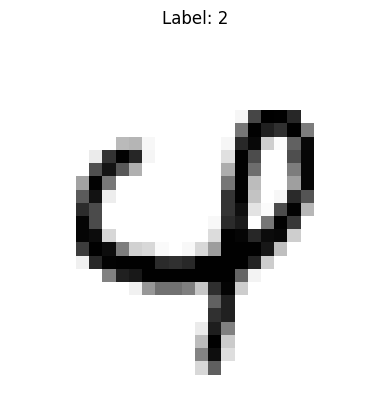

In [54]:
show_digit(16)

In [55]:
X = df.iloc[:, 1:].values / 255.0
y = df.iloc[:, 0].values

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

In [59]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [61]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8538 - loss: 0.5113
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9431 - loss: 0.1928
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9589 - loss: 0.1427
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9629 - loss: 0.1270
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9678 - loss: 0.1073
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9716 - loss: 0.0942
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9737 - loss: 0.0903
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9760 - loss: 0.0813
Epoch 9/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9778 - loss: 0.0713
Epoch 10/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9807 - loss: 0.0636


In [64]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [65]:
print(f"Training accuracy: {train_acc:.2%}")
print(f"Test accuracy: {test_acc:.2%}")

Training accuracy: 97.78%
Test accuracy: 95.74%


In [66]:
def inspect(index):
    image = X[index].reshape(1, -1)
    prediction = model.predict(image, verbose=0)
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(y_encoded[index])
    print(f"Actual: {actual_label}, Predicted: {predicted_label}")
    show_digit(index)


Actual: 1, Predicted: 1


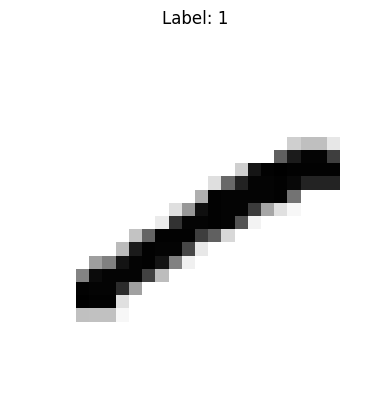

In [67]:
inspect(3)

In [68]:
def plot_confusion_matrix(X, y_true_onehot):
    y_true = np.argmax(y_true_onehot, axis=1)
    y_pred = np.argmax(model.predict(X, verbose=0), axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

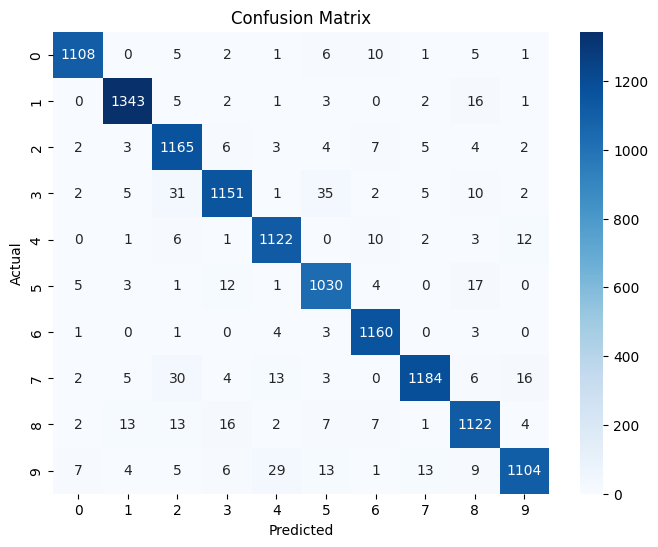

In [69]:
plot_confusion_matrix(X_test, y_test)

In [71]:
from sklearn.metrics import classification_report